In [8]:
from models import RedshiftSpace
import models as md
import pickle
import matplotlib.pyplot as plt
import numpy as np
import importlib
import seaborn as sns
from CentralStreamingModel.utils import plot_tools as pt
sns.set_context('talk')
import time
from matplotlib.colors import LogNorm

In [2]:
n_boxes = range(1,16)
boxsize = 2000
snapshot = 20

rs = []
for i, box in enumerate(n_boxes):
    rs.append(RedshiftSpace(box, boxsize, snapshot))


In [3]:
importlib.reload(md)

<module 'models' from '/home/c-cuesta/CentralStreamingModel/comparisons/models.py'>

In [4]:
t1 = time.time()
mean_rs = md.MeanRedshiftSpace( boxsize, snapshot, rs)
print(f'It took {time.time() - t1} seconds.')

It took 42.42255711555481 seconds.


Text(0, 0.5, '$s_\\parallel$ [Mpc/h]')

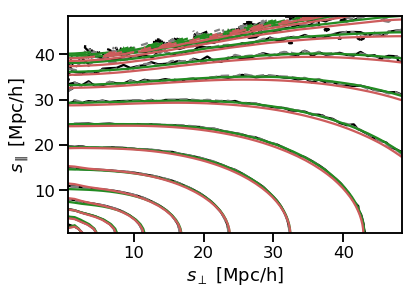

In [389]:
s_c = rs[0].measured.s_c
levels = np.arange(-4, 1, 0.3)


colors = [mean_rs.measured.color] * len(levels)
plt.contour(s_c, s_c, 
            np.log10(mean_rs.measured.pi_sigma.mean).T, 
            levels=levels, colors=colors)

colors = [mean_rs.streaming.color] * len(levels)
plt.contour(mean_rs.streaming.s_c, mean_rs.streaming.s_c,
            np.log10(mean_rs.streaming.pi_sigma).T,
           levels=levels, colors=colors, linestyles='dashed')

colors = [mean_rs.gaussian.color] * len(levels)

plt.contour(mean_rs.gaussian.s_c, mean_rs.gaussian.s_c,
            np.log10(mean_rs.gaussian.pi_sigma).T,
           levels=levels, colors=colors)


colors = [mean_rs.skewt.color] * len(levels)

plt.contour(mean_rs.skewt.s_c, mean_rs.skewt.s_c,
            np.log10(mean_rs.skewt.pi_sigma).T,
           levels=levels, colors=colors)

#plt.xlim(0,30)

#plt.ylim(0,30)

plt.xlabel('$s_\perp$ [Mpc/h]')
plt.ylabel('$s_\parallel$ [Mpc/h]')

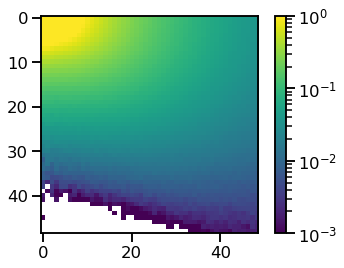

In [22]:
plt.imshow((mean_rs.streaming.pi_sigma).T, interpolation = None,
          norm=LogNorm(vmin=1e-3, vmax=1))
plt.colorbar()

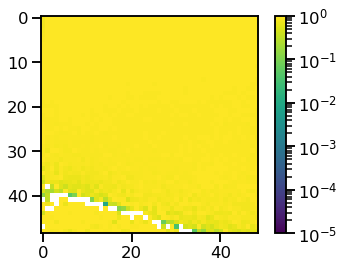

In [30]:
plt.imshow((mean_rs.skewt.pi_sigma).T/(mean_rs.measured.pi_sigma.mean).T, interpolation = None,
          norm=LogNorm(vmin=1e-5, vmax=1))
plt.colorbar()

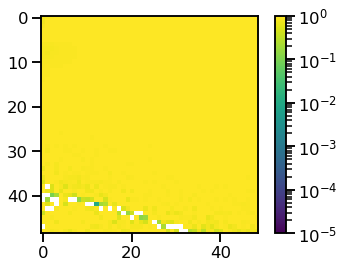

In [48]:
plt.imshow((mean_rs.gaussian.pi_sigma).T/(mean_rs.measured.pi_sigma.mean).T, interpolation = None,
          norm=LogNorm(vmin=1e-5, vmax=1))
plt.colorbar()

In [39]:
n_mu_bins = 120 
mu_bins = np.linspace(0.,1.,n_mu_bins)
mu_c = 0.5*(mu_bins[1:] + mu_bins[:-1])


(0.3, 0.5)

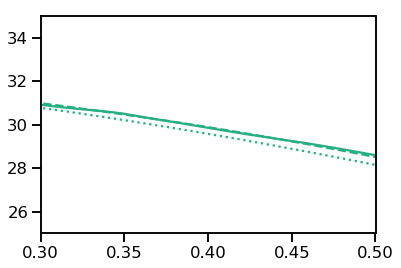

In [80]:
plt.contour(mu_c, s_c, np.log10(mean_rs.streaming.s_mu), levels=levels)
plt.contour(mu_c, s_c, np.log10(mean_rs.gaussian.s_mu), levels=levels, linestyles='dashed')
plt.contour(mu_c, s_c, np.log10(mean_rs.skewt.s_mu), levels=levels, linestyles='dotted')
plt.ylim(25,35)
plt.xlim(0.3,0.5)

In [50]:
import importlib
importlib.reload(pt)

<module 'CentralStreamingModel.utils.plot_tools' from '/home/c-cuesta/CentralStreamingModel/utils/plot_tools.py'>

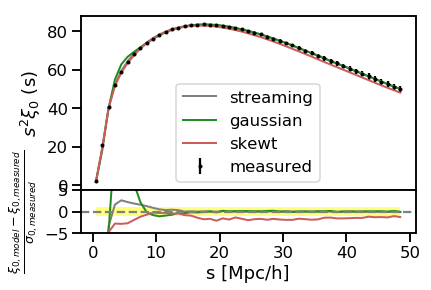

In [51]:
pt.plot_attribute_residual( mean_rs, ['streaming','gaussian', 'skewt'],
                    'monopole',  r'$s^2\xi_0$ (s)', 
                           r'$\frac{\xi_{0,model} - \xi_{0, measured}}{\sigma_{0, measured}}$')


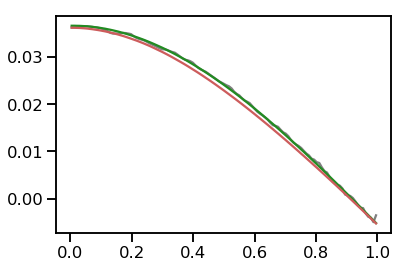

In [52]:
# Monopole integrand
s = 48
integrand = mean_rs.streaming.s_mu[s,:]
mu = np.linspace(0.,1.,120)
mu_c = 0.5 * (mu[1:] + mu[:-1])
plt.plot(mu_c, mean_rs.streaming.s_mu[s,:], color=mean_rs.streaming.color)
plt.plot(mu_c, mean_rs.gaussian.s_mu[s,:], color=mean_rs.gaussian.color)
plt.plot(mu_c, mean_rs.skewt.s_mu[s,:], color=mean_rs.skewt.color)

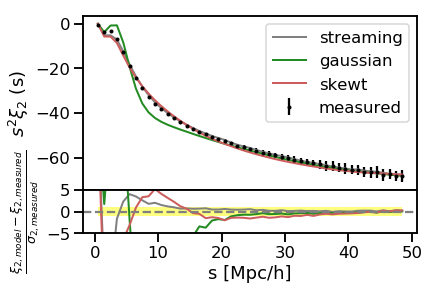

In [53]:
pt.plot_attribute_residual( mean_rs, ['streaming', 'gaussian', 'skewt'],
                    'quadrupole', r'$s^2\xi_2$ (s)',
        r'$\frac{\xi_{2,model} - \xi_{2, measured}}{\sigma_{2, measured}}$')


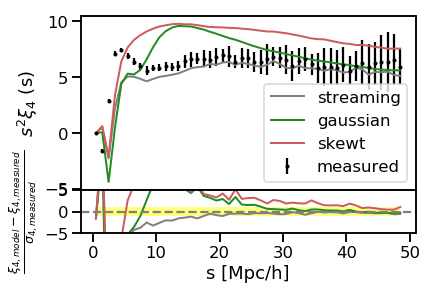

In [54]:
pt.plot_attribute_residual( mean_rs, ['streaming', 'gaussian', 'skewt'],
                    'hexadecapole', r'$s^2\xi_4$ (s)',
        r'$\frac{\xi_{4,model} - \xi_{4, measured}}{\sigma_{4, measured}}$')


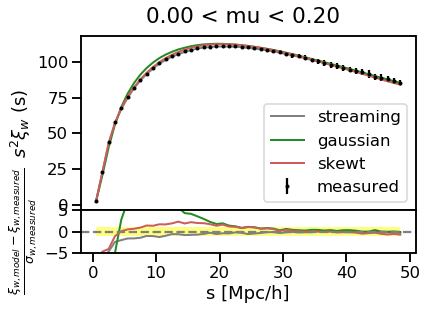

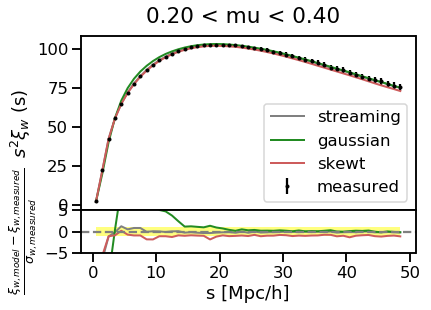

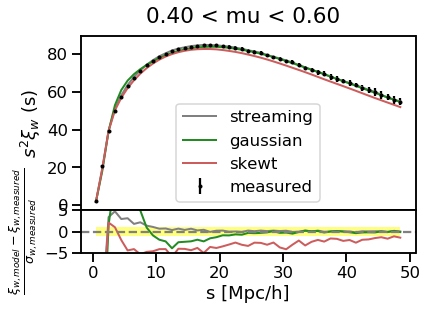

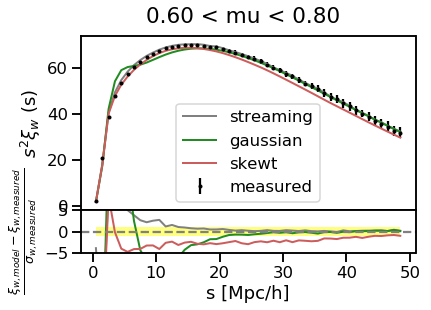

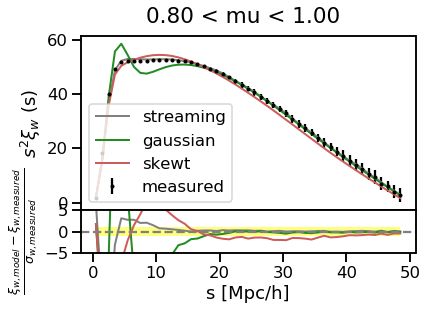

In [55]:
n_wedges = 5

for wedge in range(n_wedges):
    
    pt.plot_attribute_residual( mean_rs, ['streaming', 'gaussian', 'skewt'],
                    f'wedge_{wedge}', r'$s^2\xi_w$ (s)',
        r'$\frac{\xi_{w,model} - \xi_{w, measured}}{\sigma_{w, measured}}$',
        title =f'{mean_rs.skewt.wedges_bins[wedge]:.2f} < mu < {mean_rs.skewt.wedges_bins[wedge+1]:.2f}' )
    plt.show()

## Compare integration methods

In [379]:
full_integral = simps(mean_rs.streaming.integrand, mean_rs.streaming.int_r_parallel, axis = -1)  - 1.

In [417]:
cut = 0.
left = mean_rs.streaming.int_r_parallel < cut
right = mean_rs.streaming.int_r_parallel > cut

int_left = simps(mean_rs.streaming.integrand[...,left],
        mean_rs.streaming.int_r_parallel[left])

int_right = simps(mean_rs.streaming.integrand[...,right],
        mean_rs.streaming.int_r_parallel[right])

cut_integral = int_left + int_right -1.

In [418]:

zeros_int_left = simps(np.where(mean_rs.streaming.int_r_parallel < cut, 
            mean_rs.streaming.integrand, 0.), mean_rs.streaming.int_r_parallel)

zeros_int_right = simps(np.where(mean_rs.streaming.int_r_parallel > cut, 
            mean_rs.streaming.integrand, 0.), mean_rs.streaming.int_r_parallel)

zeros_integral = zeros_int_left + zeros_int_right -1.

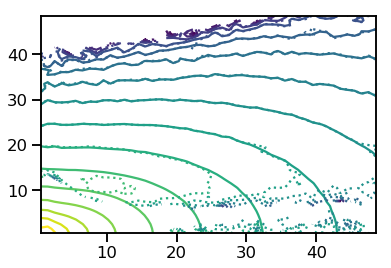

In [421]:
#plt.contour(s_c, s_c, np.log10(full_integral).T, levels=levels)
plt.contour(s_c, s_c, np.log10(cut_integral).T, levels=levels)
#plt.contour(s_c, s_c, np.log10(zeros_integral).T, levels=levels, linestyles='dashed')
plt.contour(s_c, s_c, np.log10(full_integral).T, levels=levels, linestyles='dotted')

(-1, 10)

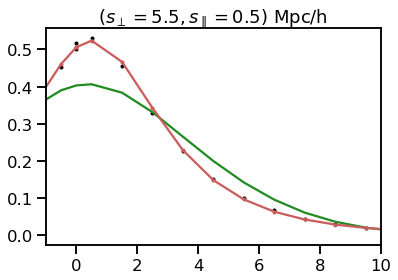

In [426]:
s = 6
mu = 0.1
rperp = int(s * (1 - mu**2))
rparal = int(s * mu)
plt.title(r'($ s_\perp = %.1f'
               ', s_\parallel = %.1f)$ Mpc/h'%(rs[0].measured.r_perp[rperp],
                                               rs[0].measured.r_parallel[rparal]))
plt.plot(mean_rs.streaming.int_r_parallel,
        mean_rs.streaming.integrand[rperp,rparal], 
        linestyle='', marker='o',
        markersize=3, color='k', label='Measured')



plt.plot(mean_rs.gaussian.int_r_parallel,
        mean_rs.gaussian.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.gaussian.color, label='Gaussian')

plt.plot(mean_rs.skewt.int_r_parallel,
        mean_rs.skewt.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.skewt.color, label='ST', marker='o', markersize=3)


plt.xlim(-1,10)

In [501]:
limits

[0.0, 5.0, 13, 18, 25, 70.25]

In [1]:
s = 35
mu = 0.5
rperp = int(s * (1 - mu**2))
rparal = int(s * mu)
plt.title(r'($ s_\perp = %.1f'
               ', s_\parallel = %.1f)$ Mpc/h'%(rs[0].measured.r_perp[rperp],
                                               rs[0].measured.r_parallel[rparal]))
plt.plot(mean_rs.streaming.int_r_parallel,
        mean_rs.streaming.integrand[rperp,rparal], 
        linestyle='', marker='o',
        markersize=3, color='k', label='Measured')



plt.plot(mean_rs.gaussian.int_r_parallel,
        mean_rs.gaussian.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.gaussian.color, label='Gaussian')

plt.plot(mean_rs.skewt.int_r_parallel,
        mean_rs.skewt.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.skewt.color, label='ST')

limits = [0.,5., rparal -2, rparal+3, rparal+10, 70.25]
#limits = [0., 5.,10.,70.]
for limit in limits:
    plt.axvline(x = limit, color='gray', linestyle='--')

plt.xlim(-5,70)


int_r = mean_rs.gaussian.int_r_parallel

plt.ylabel('Streaming Integrand')
plt.xlabel('$r_\parallel$ [Mpc/h]')
plt.show()


plt.semilogy(mean_rs.streaming.int_r_parallel,
        mean_rs.streaming.integrand[rperp,rparal], 
        linestyle='', marker='o',
        markersize=3, color='k', label='Measured')



plt.semilogy(mean_rs.gaussian.int_r_parallel,
        mean_rs.gaussian.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.gaussian.color, label='Gaussian')

plt.semilogy(mean_rs.skewt.int_r_parallel,
        mean_rs.skewt.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.skewt.color, label='ST')

for limit in limits:
    plt.axvline(x = limit, color='gray', linestyle='--')

plt.xlim(-5,70)
plt.ylabel('Streaming Integrand')
plt.xlabel('$r_\parallel$ [Mpc/h]')
plt.show()


NameError: name 'plt' is not defined

In [473]:
total_stream = -1.
total_gauss = -1.
total_skewt = -1.

areas = ['i)', 'ii)', 'iii)', 'iv)', 'v)', 'vi)', 'vii)']

left = mean_rs.streaming.int_r_parallel < 0.
right = mean_rs.streaming.int_r_parallel > 0.

int_left = simps(mean_rs.streaming.integrand[rperp, rparal, left],
        mean_rs.streaming.int_r_parallel[left])

integrand = mean_rs.streaming.integrand[rperp,rparal, right]
r_parallel = mean_rs.streaming.int_r_parallel[right]

int_left_gauss = simps(mean_rs.gaussian.integrand[rperp, rparal, left],
        mean_rs.streaming.int_r_parallel[left])

integrand_gauss = mean_rs.gaussian.integrand[rperp,rparal, right]

int_left_skewt = simps(mean_rs.skewt.integrand[rperp, rparal, left],
        mean_rs.streaming.int_r_parallel[left])

integrand_skewt = mean_rs.skewt.integrand[rperp,rparal, right]

total_stream += int_left
total_skewt += int_left_skewt
total_gauss += int_left_gauss

print(f'0) Gaussian {(int_left_gauss - int_left):.4f}, '
              f'Skewt {(int_left_skewt - int_left):.4f}')#, Stream : {stream_:.4f} ')  
for i in range(len(limits)-1):
    

    stream_ = simps(np.where((r_parallel > limits[i]) & (r_parallel < limits[i+1]),
                                integrand, 0) ,r_parallel)
    gauss_ = simps(np.where((r_parallel > limits[i]) & (r_parallel < limits[i+1]),
                                integrand_gauss, 0) ,r_parallel)
    
    skewt_ = simps(np.where((r_parallel > limits[i]) & (r_parallel < limits[i+1]),
                                integrand_skewt, 0) ,r_parallel)
    


    total_stream += stream_
    total_gauss += gauss_
    total_skewt += skewt_
    
    print(f'{areas[i]} Gaussian {(gauss_ - stream_):.4f}, '
              f'Skewt {(skewt_ - stream_):.4f}')#, Stream : {stream_:.4f} ')  
    
print('___________________________________')
print(f'Gaussian {(total_gauss - total_stream):.4f},    Skewt {(total_skewt - total_stream):.4f}\n\n')
  

0) Gaussian -0.0002, Skewt 0.0002
i) Gaussian -0.0017, Skewt 0.0003
ii) Gaussian 0.0183, Skewt 0.0006
iii) Gaussian -0.0486, Skewt -0.0047
iv) Gaussian 0.0410, Skewt -0.0016
v) Gaussian -0.0092, Skewt 0.0016
___________________________________
Gaussian -0.0005,    Skewt -0.0036




Std gaussian :  3.347759625974998
std measured :  3.362199802822121
Peak gaussian :  0.11916694296271202
Peak measured :  0.13247977737207275


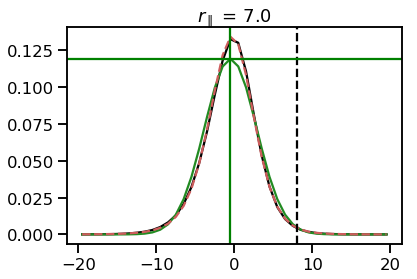

Std gaussian :  3.566368690387081
std measured :  3.57858585607407
Peak gaussian :  0.111862321323299
Peak measured :  0.12255232551616342


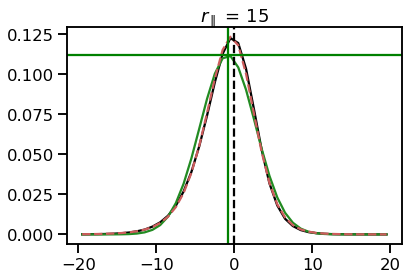

Std gaussian :  3.7113469072561642
std measured :  3.7169257950906407
Peak gaussian :  0.10749258702317717
Peak measured :  0.1161310967808733


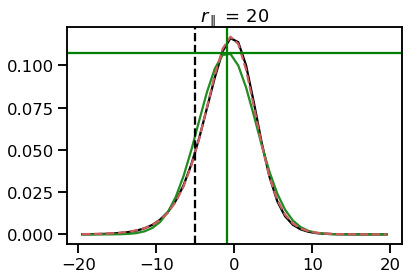

Std gaussian :  3.894110701500388
std measured :  3.8973050800023192
Peak gaussian :  0.1024475961219391
Peak measured :  0.10909452530621526


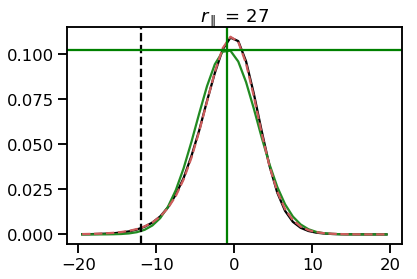

In [498]:

check_r_parallel = [7., rparal, rparal+5, rparal+12]


for crp in check_r_parallel:
    v_los = mean_rs.per_box_list[0].measured.v_los

    sample_skewt = np.zeros_like(v_los)

    for i,vl in enumerate(v_los):
        sample_skewt[i] = mean_rs.skewt.jointpdf_los(rperp, int(abs(crp)), vl)
    plt.title(f'$r_\parallel$ = {crp}')
    plt.plot(v_los,
             mean_rs.measured.jointpdf_los.mean[rperp, int(abs(crp))],
                color='black')
    #plt.plot(v_los+0.5,
    #         mean_rs.gaussian.jointpdf_los(rperp, int(abs(crp)), v_los),
    #            color = 'forestgreen', linestyle='dotted')
    plt.plot(v_los,
             mean_rs.gaussian.jointpdf_los(rperp, (abs(crp)), v_los),
                color = 'forestgreen', linestyle='-')
    plt.plot(v_los,
             sample_skewt,
                color = 'indianred', linestyle='dashed')
    plt.axvline(x = (rparal - crp) * np.sign(crp),
               color = 'black', linestyle='dashed')
    
    dv = abs(v_los[1] - v_los[0])
    mean_gaussian = dv * np.sum(v_los * mean_rs.gaussian.jointpdf_los(rperp, (abs(crp)), v_los))
    std_gaussian = np.sqrt(dv * np.sum((v_los - mean_gaussian)**2 * mean_rs.gaussian.jointpdf_los(rperp, (abs(crp)),
                                    v_los)))
    
    mean_measured = dv * np.sum(v_los * mean_rs.streaming.jointpdf_los[rperp, int(abs(crp)), :])
    std_measured = np.sqrt(dv * np.sum((v_los - mean_measured)**2 * mean_rs.streaming.jointpdf_los[rperp,
                                    int(abs(crp)),:]))
    
    print('Std gaussian : ', std_gaussian)
    print('std measured : ', std_measured)
    
    print('Peak gaussian : ', 1/np.sqrt(2*np.pi)/std_gaussian)
    print('Peak measured : ', np.max(mean_rs.streaming.jointpdf_los[rperp, int(abs(crp)),:]))
    
    plt.axvline(x = mean_gaussian, color = 'green')
    plt.axhline(y = 1/np.sqrt(2*np.pi)/std_gaussian, color='green')

    plt.show()

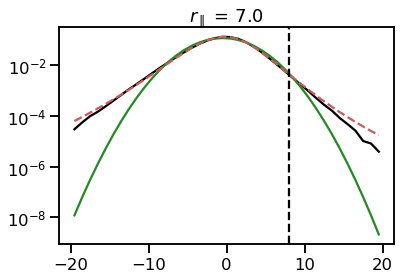

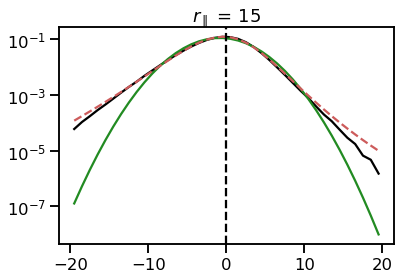

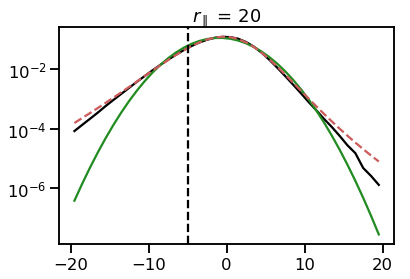

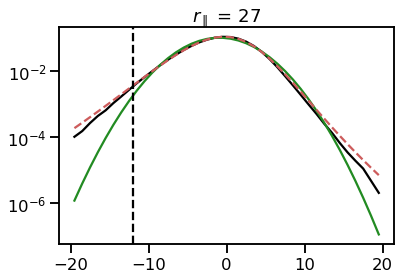

In [484]:
for crp in check_r_parallel:
    v_los = mean_rs.per_box_list[0].measured.v_los

    sample_skewt = np.zeros_like(v_los)

    for i,vl in enumerate(v_los):
        sample_skewt[i] = mean_rs.skewt.jointpdf_los(rperp, int(abs(crp)), vl)
    plt.title(f'$r_\parallel$ = {crp}')
    plt.semilogy(v_los,
             mean_rs.measured.jointpdf_los.mean[rperp, int(abs(crp))],
                color='black')
    #plt.semilogy(v_los+0.5,
    #         mean_rs.gaussian.jointpdf_los(rperp, int(abs(crp)), v_los),
    #            color = 'forestgreen', linestyle='dotted')
    plt.semilogy(v_los,
             mean_rs.gaussian.jointpdf_los(rperp, int(abs(crp)), v_los),
                color = 'forestgreen', linestyle='-')
    plt.semilogy(v_los,
             sample_skewt,
                color = 'indianred', linestyle='dashed')
    plt.axvline(x = (rparal - crp) * np.sign(crp),
               color = 'black', linestyle='dashed')
    plt.show()

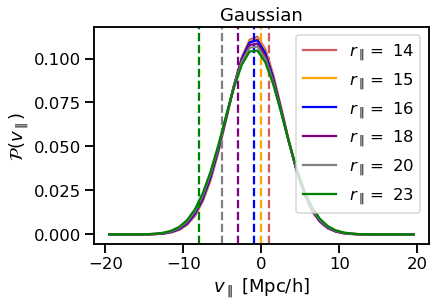

In [512]:
#check_r_parallel = [-5,-2, -0.0001, 0.0001, 2, 5,s*mu,18,24,30]
check_r_parallel = [14,15,16,18, 20, 23]
colors = ['indianred', 'orange','blue', 'purple', 'gray', 'green']
for i, crp in enumerate(check_r_parallel):
    v_los = mean_rs.per_box_list[0].measured.v_los

    #plt.plot(v_los,
    #         mean_rs.measured.jointpdf_los.mean[rperp, int(abs(crp))],
    #            color='black')
    #plt.plot(v_los+0.5,
    #         mean_rs.gaussian.jointpdf_los(rperp, int(abs(crp)), v_los),
    #            color = 'forestgreen', linestyle='dotted')
    plt.plot(v_los,
             mean_rs.gaussian.jointpdf_los(rperp, int(abs(crp)), v_los),
                color = colors[i], linestyle='-', label = f'$r_\parallel = $ {crp}')

    plt.axvline(x = (rparal - crp) * np.sign(crp),
               color = colors[i], linestyle='dashed')
plt.ylabel(r'$\mathcal{P} (v_\parallel) $ ')
plt.title('Gaussian')
plt.xlabel(r'$v_\parallel$ [Mpc/h]')
plt.legend()
plt.show()

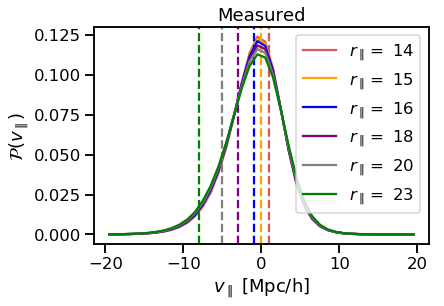

In [513]:
#check_r_parallel = [-5,-2, -0.0001, 0.0001, 2, 5,s*mu,18,24,30]
check_r_parallel = [14,15,16,18, 20, 23]
colors = ['indianred', 'orange','blue', 'purple', 'gray', 'green']
for i, crp in enumerate(check_r_parallel):
    v_los = mean_rs.per_box_list[0].measured.v_los

    plt.plot(v_los,
             mean_rs.measured.jointpdf_los.mean[rperp, int(abs(crp))],
                color=colors[i], label = f'$r_\parallel = $ {crp}')
    #plt.plot(v_los+0.5,
    #         mean_rs.gaussian.jointpdf_los(rperp, int(abs(crp)), v_los),
    #            color = 'forestgreen', linestyle='dotted')
    #plt.plot(v_los,
    #         mean_rs.gaussian.jointpdf_los(rperp, int(abs(crp)), v_los),
    #            color = colors[i], linestyle='-', label = f'$r_\parallel = $ {crp}')

    plt.axvline(x = (rparal - crp) * np.sign(crp),
               color = colors[i], linestyle='dashed')
plt.ylabel(r'$\mathcal{P} (v_\parallel) $ ')
plt.title('Measured')
plt.xlabel(r'$v_\parallel$ [Mpc/h]')
plt.legend()
plt.show()

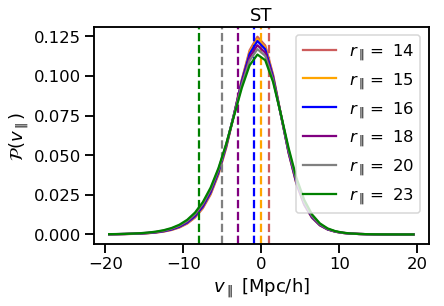

In [517]:
check_r_parallel = [14,15,16,18, 20, 23]
colors = ['indianred', 'orange','blue', 'purple', 'gray', 'green']
for i, crp in enumerate(check_r_parallel):
    v_los = mean_rs.per_box_list[0].measured.v_los

    sample_skewt = np.zeros_like(v_los)

    for k,vl in enumerate(v_los):
        sample_skewt[k] = mean_rs.skewt.jointpdf_los(rperp, (abs(crp)), vl)
    #plt.plot(v_los,
    #         mean_rs.measured.jointpdf_los.mean[rperp, int(abs(crp))],
    #            color=colors[i], label = f'$r_\parallel = $ {crp}')

    plt.plot(v_los,
             sample_skewt,
                color = colors[i], linestyle='-', label = f'$r_\parallel = $ {crp}')

    plt.axvline(x = (rparal - crp) * np.sign(crp),
               color = colors[i], linestyle='dashed')
plt.ylabel(r'$\mathcal{P} (v_\parallel) $ ')
plt.title('ST')
plt.xlabel(r'$v_\parallel$ [Mpc/h]')
plt.legend()
plt.show()

## Integrand

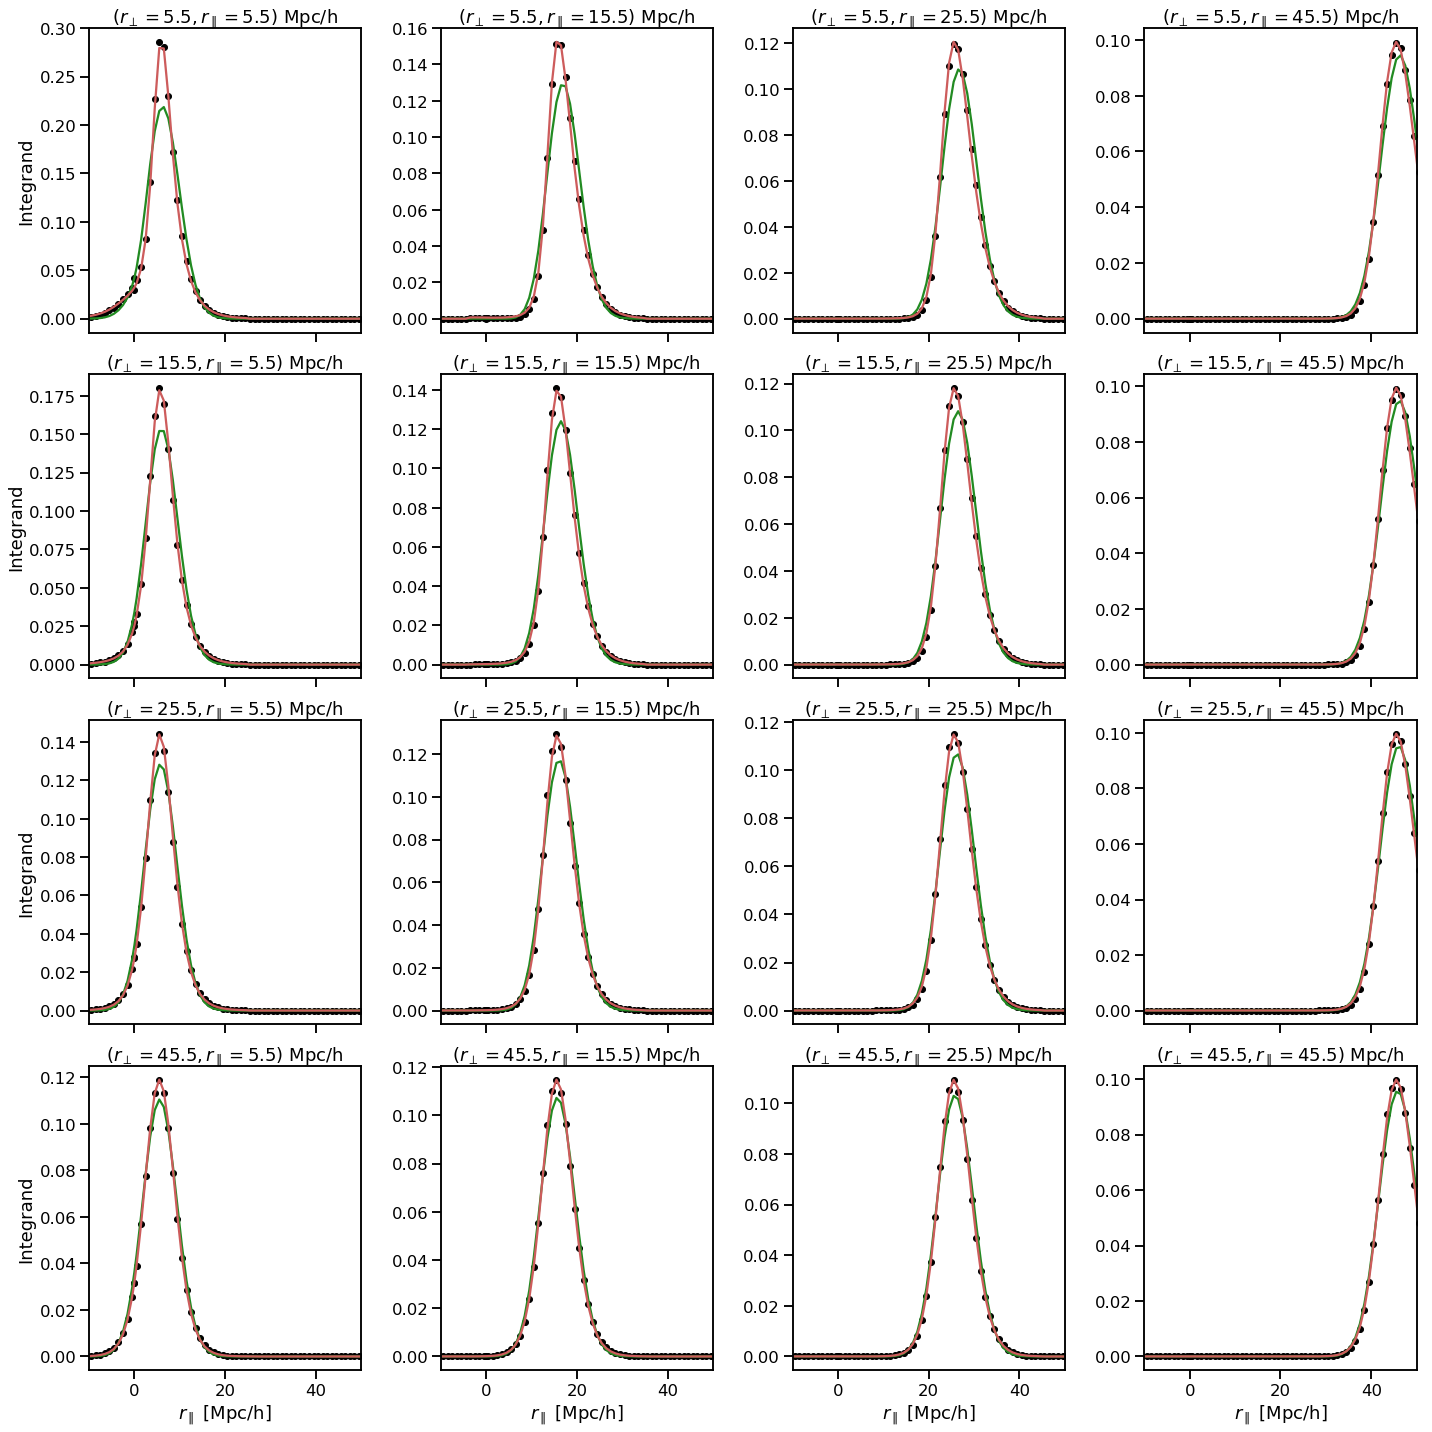

In [23]:
rlist1 = [5,15,25,45]
rlist2 = [5,15,25,45]

fig, axes = plt.subplots(nrows=len(rlist2),
                         ncols=len(rlist1),sharex=True,
                         sharey=False, figsize=(20,20))

for i, rperp in enumerate(rlist2):
    for j, rparal in enumerate(rlist1):
        axes[i,j].set_title(r'($ r_\perp = %.1f'
                       ', r_\parallel = %.1f)$ Mpc/h'%(rs[0].measured.r_perp[rperp],
                                                       rs[0].measured.r_parallel[rparal]))
        axes[i,j].plot(mean_rs.streaming.int_r_parallel,
                mean_rs.streaming.integrand[rperp,rparal], 
                linestyle='', marker='o',
                markersize=6, color='k', label='Measured')

        axes[i,j].plot(mean_rs.gaussian.int_r_parallel,
                mean_rs.gaussian.integrand[rperp,rparal], 
                linestyle='-',
                    color= mean_rs.gaussian.color, label='Gaussian')
        
        axes[i,j].plot(mean_rs.skewt.int_r_parallel,
                mean_rs.skewt.integrand[rperp,rparal], 
                linestyle='-',
                    color= mean_rs.skewt.color, label='ST')
        axes[i,j].set_xlim(-10, 50)
        if j == 0:
            axes[i,j].set_ylabel(r'Integrand')
            #labels = list(axes[i,j].get_yticklabels())
            #labels[-1] = ''
            #axes[i,j].set_yticklabels(labels)
            
        if i == len(rlist2)-1:
            axes[i,j].set_xlabel(r'$r_\parallel$ [Mpc/h]')
            
        #if i==len(rlist2)-1 and j==0:
        #    axes[i,j].legend()
            
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
